In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**参数详解**


1. df (data)
   - 数据框，包含要绘制的数据。
   - 例如：df = pd.DataFrame(dict(x=x, g=g))。
2. row
   - 指定按照哪一列的分类变量分行创建子图。
   - 例如：row="g" 按照 g 列的不同值创建不同的行，每个值对应一行。
3. hue
   - 指定按照哪一列的分类变量上色。
   - 例如：hue="g" 按照 g 列的不同值使用不同的颜色。
4. aspect
   - 控制子图的宽高比（宽度/高度）。
   - 例如：aspect=15 子图的宽度是高度的15倍。
5. height
   - 每个子图的高度（以英寸为单位）。
   - 例如：height=1 每个子图的高度设置为 1 英寸。
6. palette
   - 指定用于不同 hue 水平的调色板。
   - 例如：palette=pal 使用预先定义的 pal 调色板。
7. col
   - 指定按照哪一列的分类变量分列创建子图。
   - 例如：col="h" 按照 h 列的不同值创建不同的列，每个值对应一列。
8. col_wrap
   - 指定每行显示的最大列数，当列数超过这个值时，创建新的一行。
   - 例如：col_wrap=4 每行最多显示4个子图。
9. sharex
    - 是否共享子图的 x 轴。
    - 例如：sharex=True 所有子图共享 x 轴。
10. sharey
    - 是否共享子图的 y 轴。
    - 例如：sharey=True 所有子图共享 y 轴。
11. margin_titles
    - 是否将标题放在边缘（避免重叠）。
    - 例如：margin_titles=True 将标题放在边缘。
12. despine
    - 是否移除子图的顶部和右侧的脊柱。
    - 例如：despine=True 移除顶部和右侧的脊柱。

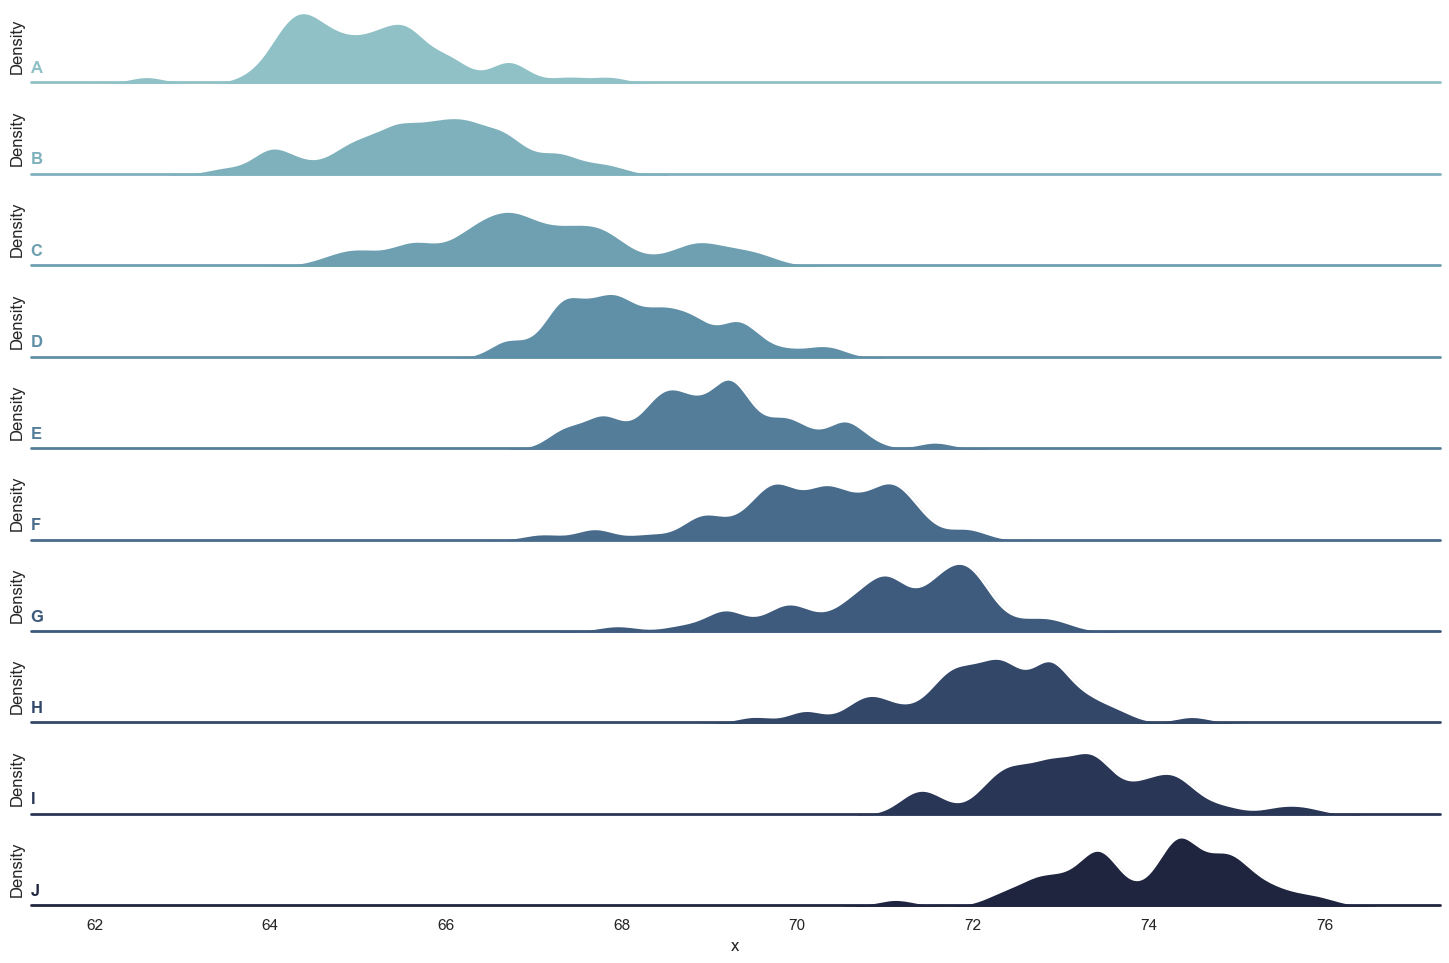

In [13]:
""" 重叠密度(山脊图) """

# 设置 Seaborn 样式和坐标轴背景颜色
sns.set(style='white', rc={"axes.facecolor": (0, 0, 0, 0)}) 

rs = np.random.RandomState(2000)  # 生成随机数种子
x = rs.randn(500) # 生成 500 个正态分布的随机数
g = np.tile(list("ABCDEFGHIJ"), 50) # 重复 10 个字母， 每个字母重复 50 次
df = pd.DataFrame(dict(x=x, g=g)) # 创建数据框 (x, g)
m = df.g.map(ord) # 将字母转化为 ASCII 码
df["x"] += m # 将 x 值加上对应字母的 ASCII

# 创建调色板
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# 初始化 FacetGrid 对象，按字母分行，每行一个密度图
g = sns.FacetGrid(
    df, # 数据
    row="g", # 指定按照 g 列的分类变量分行创建子图
    hue="g", # 指定按照 g 列的分类变量上色
    aspect=15, # 子图的宽度是高度的15倍
    height=1, #  每个子图的高度设置为 1 英寸
    palette=pal # 使用预先定义的 pal 调色板
)

# 绘制密度图，填充区域和边界线
g.map( # map 函数将指定的绘图函数映射到 FacetGrid 中的每个子图上。
    sns.kdeplot,
    'x',           # 数据列名
    clip_on=False, # 禁用剪辑
    fill=True,     # 填充区域
    alpha=1,       # 透明度
    lw=1.5,        # 线宽
    bw_method=.2   # 带宽方法
)
g.map(sns.kdeplot, 'x', clip_on=False, color='w', lw=2, bw_method=.2)
# 添加水平线
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# 在每个子图上添加标签
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

g.map(label, 'x')

# 设置子图重叠
g.fig.subplots_adjust(hspace=0.25)

# 移除标题和坐标轴刻度
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()

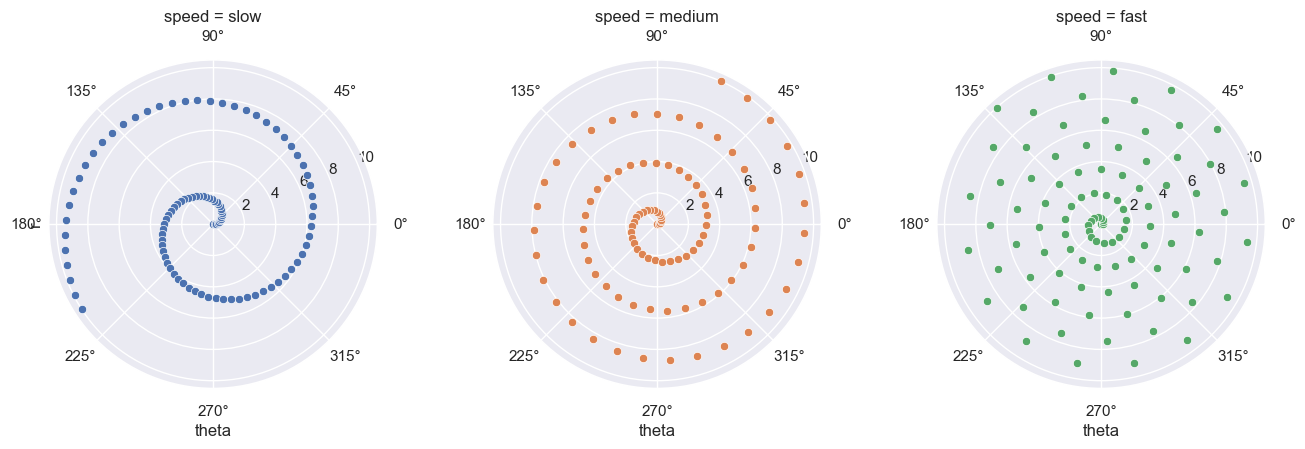

In [18]:
""" 带有自定义投影的FacetGrid """
sns.set()

# 生成一个径向数据广播示例 => 在 [0, 10] 范围内，等距离生成 100 个数据
r = np.linspace(0, 10, num=100)

# 创建一个数据框，包含四列：'r'、'slow'、'medium'、'fast'，其中 'slow'、'medium' 和 'fast' 是 'r' 的倍数
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

""" 
    将 DataFrame 转换为长格式或 tidy 格式
    函数将宽格式的数据转换为长格式，'r' 列保持不变，
    新的变量 'speed' 包含原来的列名 'slow'、'medium'、'fast'
    'theta' 包含相应的值
"""
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# 建立一个带有极投影的坐标轴网格
g = sns.FacetGrid(
    df, 
    col="speed", # 参数表示按 'speed' 列分列
    hue="speed", # 参数表示按 'speed' 列上色
    subplot_kws=dict(projection='polar'), # 参数指定子图使用极坐标投影
    height=4.5, # 参数设置每个子图的高度为 4.5 英寸
    sharex=False, #  参数表示子图不共享 x 轴
    sharey=False, #  参数表示子图不共享 y 轴
    despine=False # 参数表示不移除脊柱
)

# 在网格的每个轴上画一个散点图，x 轴为 'theta' 列，y 轴为 'r' 列
g.map(sns.scatterplot, "theta", "r")

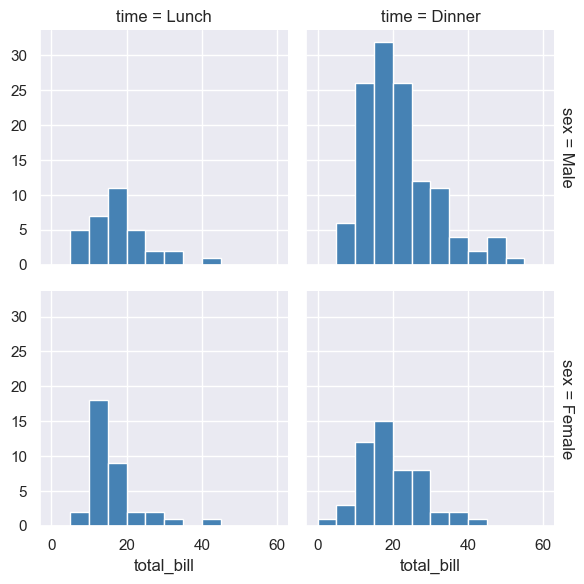

In [19]:
""" 按数据子集划分直方图 """
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(
    tips,           
    row="sex", # 按 sex 列分行
    col="time", # 按 time 列分列
    margin_titles=True # 表示标题在子图边缘。
)

bins = np.linspace(0, 60, 13)

g.map(
    plt.hist, # 在每个子图上绘制直方图。
    "total_bill", # 指定直方图的 x 轴数据为 total_bill 列的值。
    color="steelblue", # 将直方图的颜色设置为钢蓝色 (steelblue)。
    bins=bins # 定义直方图的分箱范围，使得每个子图的直方图使用相同的分箱。
)

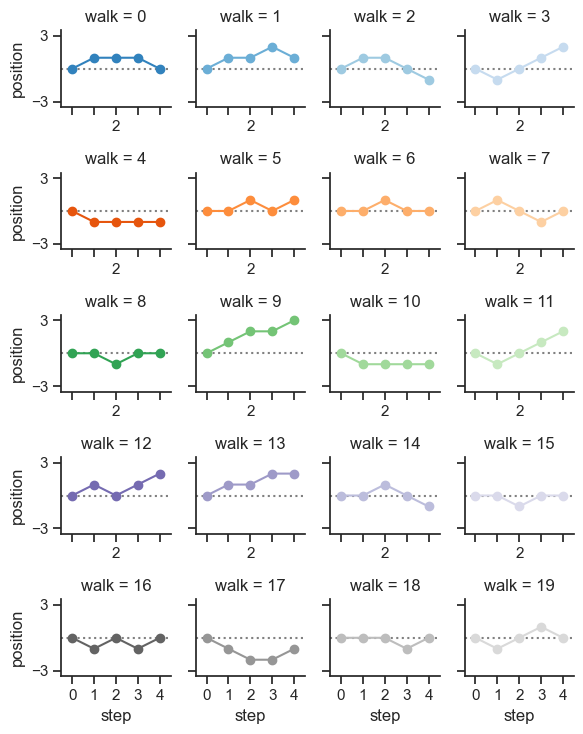

In [20]:
""" 在许多面上绘图 """
sns.set(style="ticks")

# 生成一个固定种子的随机数生成器，以确保结果可重复。
rs = np.random.RandomState(4)

# 生成一个 20 行 5 列的矩阵，其中每个元素在 -1 到 1 之间，然后按行累加。
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)

# 调整第一个位置为 0
pos -= pos[:, 0, np.newaxis]

# 生成 0 到 4 的序列，重复 20 次，形成长度为 100 的数组。
step = np.tile(range(5), 20)

# 生成 0 到 19 的序列，每个元素重复 5 次，形成长度为 100 的数组。
walk = np.repeat(range(20), 5)

# 将上述生成的数据合并为一个数据框，包含 position、step 和 walk 三列。
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# 初始化带有坐标轴的网格图
grid = sns.FacetGrid(
    df, 
    col="walk", 
    hue="walk", 
    palette="tab20c", # 调色板，使用 tab20c 颜色。    
    col_wrap=4, # 每行最多显示 4 个子图，超出部分自动换行。
    height=1.5 # 每个子图的高度为 1.5 英寸。
)

# 画一条水平线表示起点
grid.map(
    plt.axhline, # Matplotlib 函数，在每个子图上绘制水平线。
    y=0, # 水平线的 y 轴位置为 0。
    ls=":", # 线型为虚线。
    c=".5" # 颜色为灰色。
)

# 画一条线来表示每一次随机行走的轨迹
grid.map(
    plt.plot, # 在每个子图上绘制线图。
    "step", # x 轴数据来自于 step 列。
    "position", # y 轴数据来自于 position 列。
    marker="o" # 数据点标记为圆圈。
)

# 调整刻度位置和标签
grid.set(
    xticks=np.arange(5), # x 轴刻度位置为 0 到 4。
    yticks=[-3, 3],  # y 轴刻度位置为 -3 和 3。
    xlim=(-.5, 4.5), # x 轴范围为 -0.5 到 4.5。
    ylim=(-3.5, 3.5) # y 轴范围为 -3.5 到 3.5。
)


# 自动调整子图间距
grid.fig.tight_layout(w_pad=1) # 子图之间的宽度间距为 1 英寸。